__сегментация изображения с помощью кластеризации пространства цветов__

Евгений Борисов <esborisov@sevsu.ru>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# from sklearn.datasets import make_blobs

# from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
# from sklearn.cluster import DBSCAN

## сегментатор изображений

In [3]:
import os
from PIL import Image

In [4]:
!ls ../data/gmm-img-segm

04.png	1000_s.jpg  1002.png  DSC100126975_s.png  w1023_s.jpeg


In [5]:
data_folder = '../data/gmm-img-segm'

# '../data/gmm-img-segm/w1023_s.jpeg'

In [6]:
# на карте результата mask 
# заменяем номер кластера 
# на преобладающий цвет кластера 
def colorize(img,mask):
    X = np.array(img.convert('RGB'))
    n_components = mask.max()+1
    # print(X.shape)
    if len(X.shape)==3:
        h,w,c = X.shape
    elif len(X.shape)==2:
        (h,w),c = X.shape,1
    else:
        print('error: image matrix shape unknown',X.shape)
        return
    
    # цвет точки и номер кластера
    point_color = np.hstack([
            X.reshape([h*w,c]),
            mask.reshape([h*w,1])
        ])

    # преобладающий цвет по кластерам
    cluster_color = np.vstack([ 
            np.median(point_color[ point_color[:,-1]==k],axis=0) 
            for k in range(n_components) 
        ]).astype(int)

    # словарь номер кластера - цвет
    cluster_color = { x[-1]:x[:-1] for x in cluster_color }

    # заменяем номер кластера на цвет в матрице результата
    return np.array([ cluster_color[m] for m in mask.reshape([h*w]) ]).reshape([h,w,c])

In [7]:
# def img_segment(img,cspace='L',n_components=8):
#     X = np.array(img.convert(cspace))
#     # print(X.shape)
#     if len(X.shape)==3:
#         h,w,c = X.shape
#     elif len(X.shape)==2:
#         (h,w),c = X.shape,1
#     else:
#         print('error: image matrix shape unknown',X.shape)
#         return
    
#     mask = KMeans(n_clusters=n_components)\
#             .fit_predict(X.reshape([h*w,c]))\
#             .reshape([h,w])
#     return mask

In [8]:
def img_segment(img,cspace='L',n_components=8):
    X = np.array(img.convert(cspace))
    # print(X.shape)
    if len(X.shape)==3:
        h,w,c = X.shape
    elif len(X.shape)==2:
        (h,w),c = X.shape,1
    else:
        print('error: image matrix shape unknown',X.shape)
        return
    
    mask = GaussianMixture(n_components=n_components)\
            .fit_predict(X.reshape([h*w,c]))\
            .reshape([h,w])
    return mask

In [9]:
from matplotlib import cm

In [10]:
def img_segment_plot_all(n_components=0,cspace='L',data_folder=data_folder,col=2):
    test_image_files = os.listdir(data_folder)
    n_im = len(data_folder)
    fig = plt.figure(figsize=(10*col,10*(n_im//col+1)))
    for n,f in enumerate(test_image_files):
        plt.subplot(n_im//col+1,col,n+1)
        plt.axis(False)
        plt.title(f)
        img = Image.open(os.path.join(data_folder,f))
        if n_components >1:
            mask = img_segment(img,n_components=n_components,cspace=cspace)
            img = colorize(img,mask)
            # img = np.uint8(cm.gist_earth(img)*255)
            # img = Image.fromarray(img)
        plt.imshow(img)
    fig.tight_layout() 

## картинки для сегментации

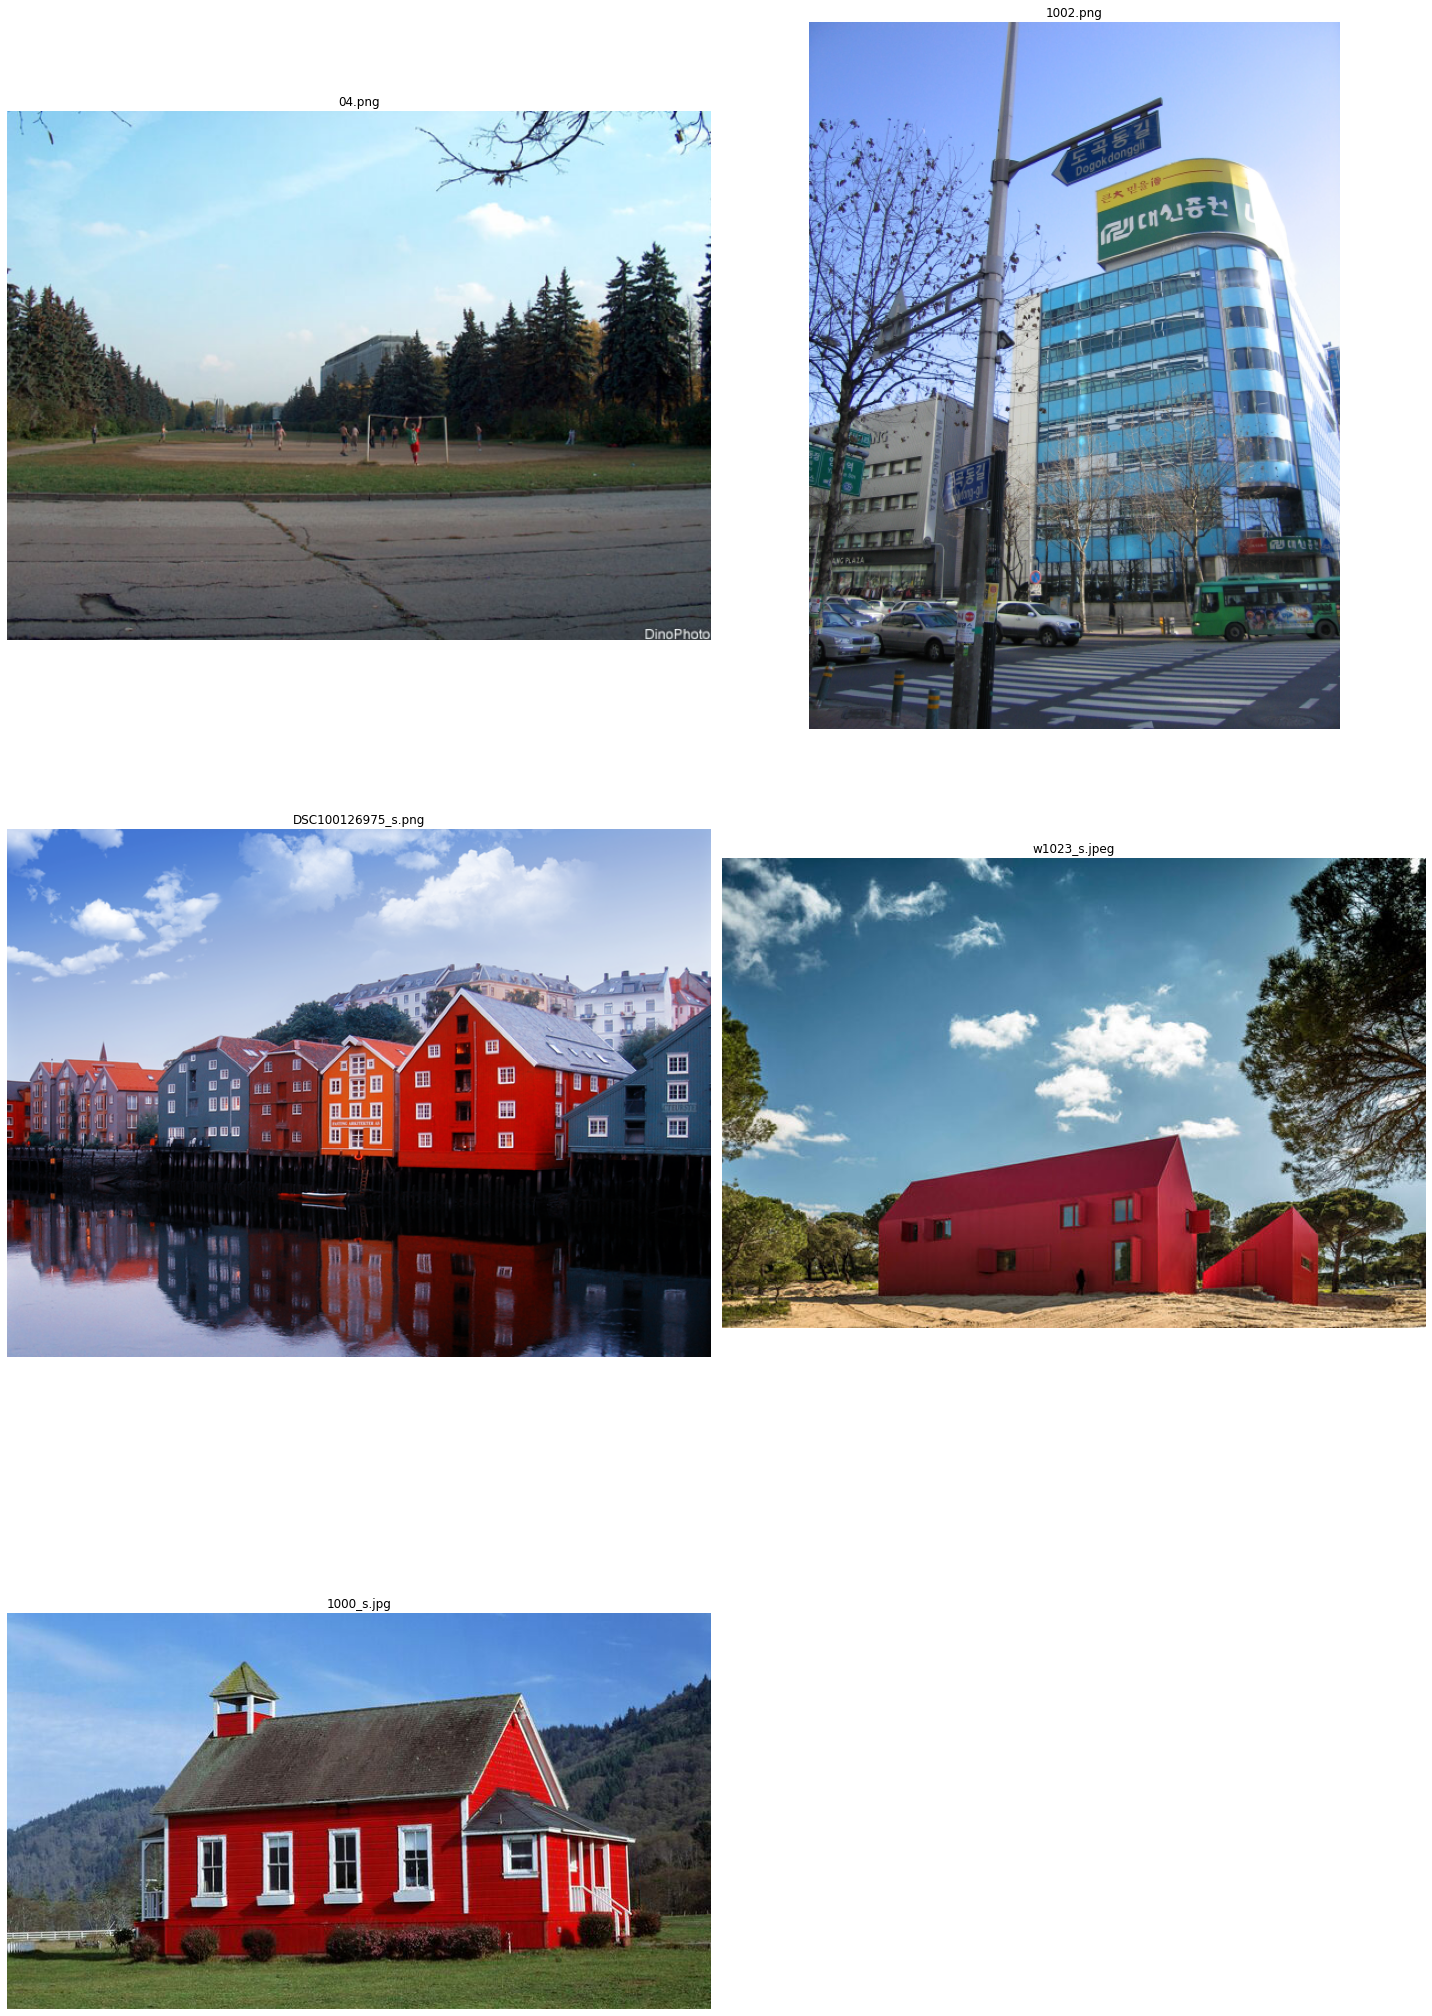

In [11]:
img_segment_plot_all()

## GRAYSCALE

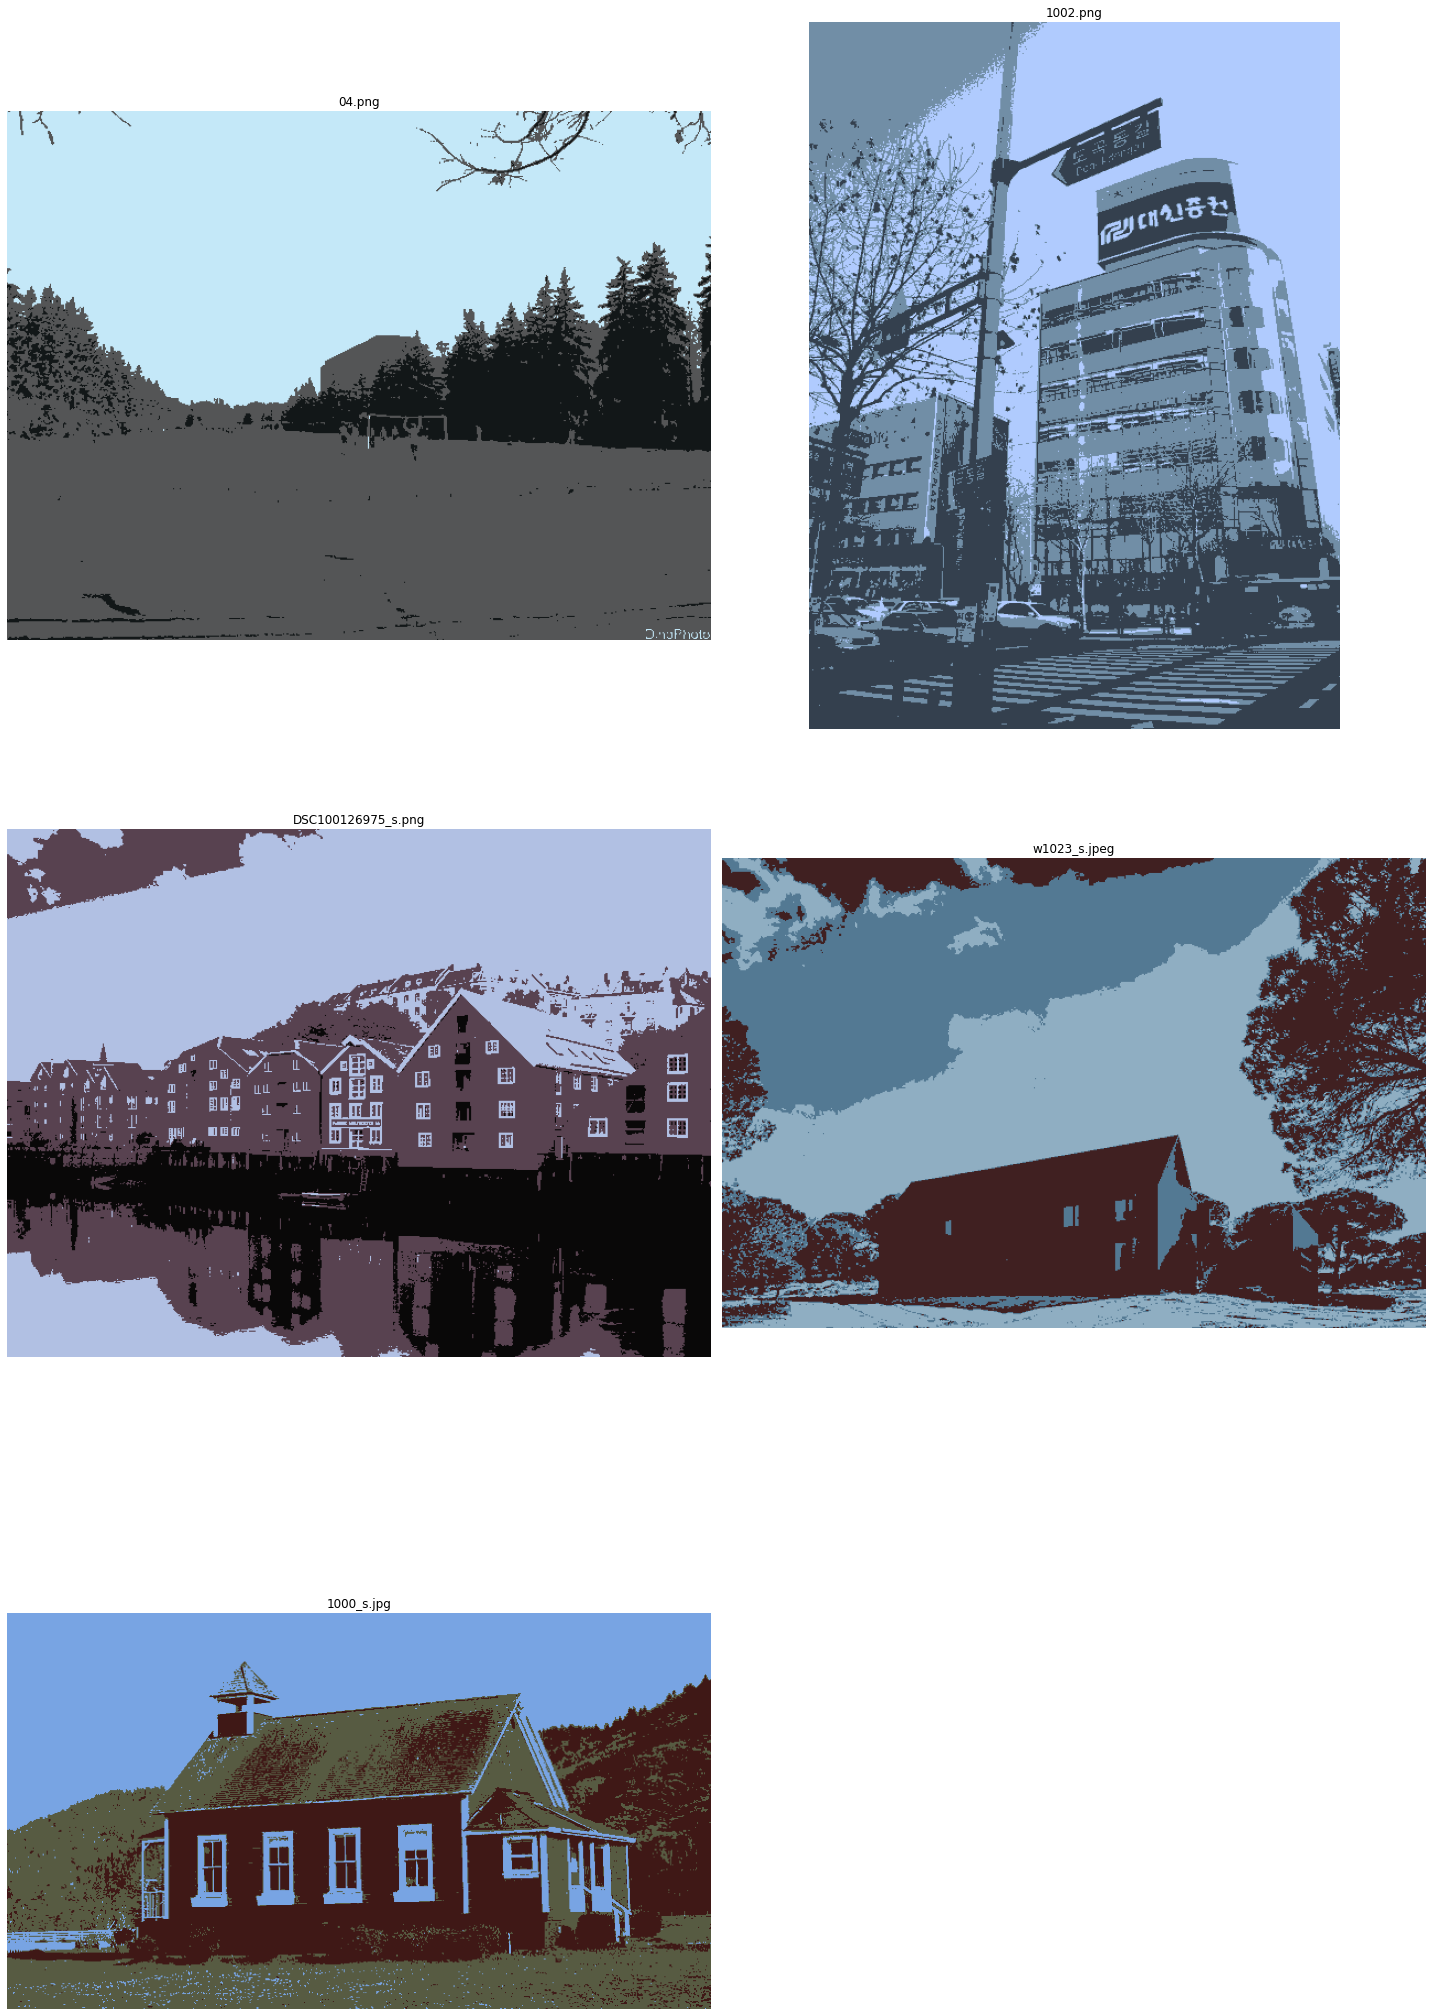

In [12]:
img_segment_plot_all(n_components=3)

## RGB

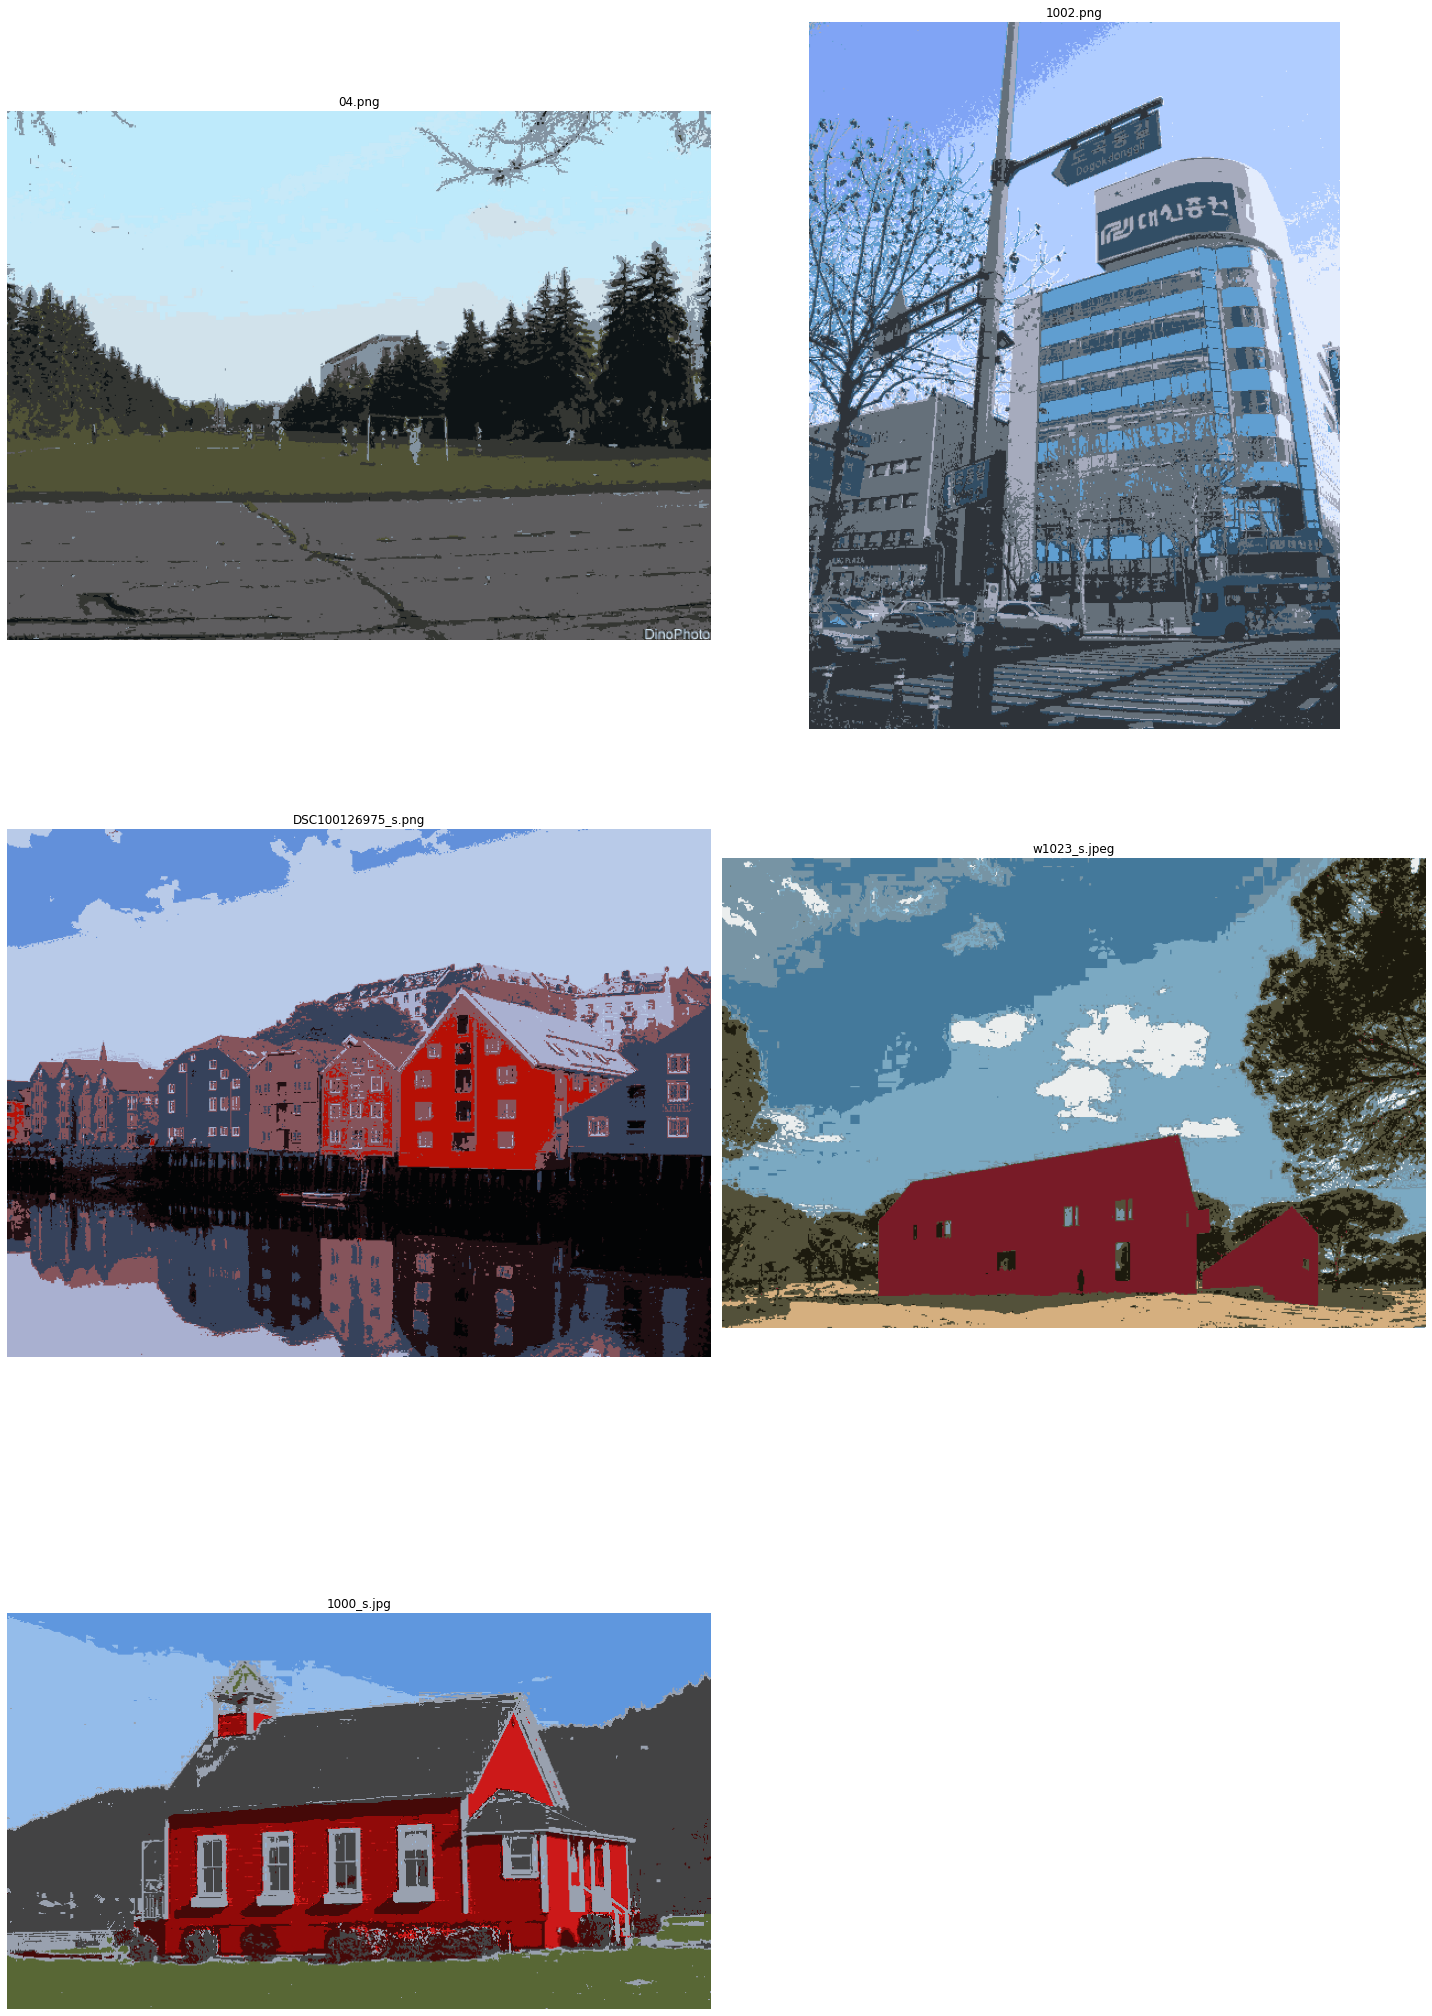

In [13]:
img_segment_plot_all(n_components=8,cspace='RGB')

##  HSV

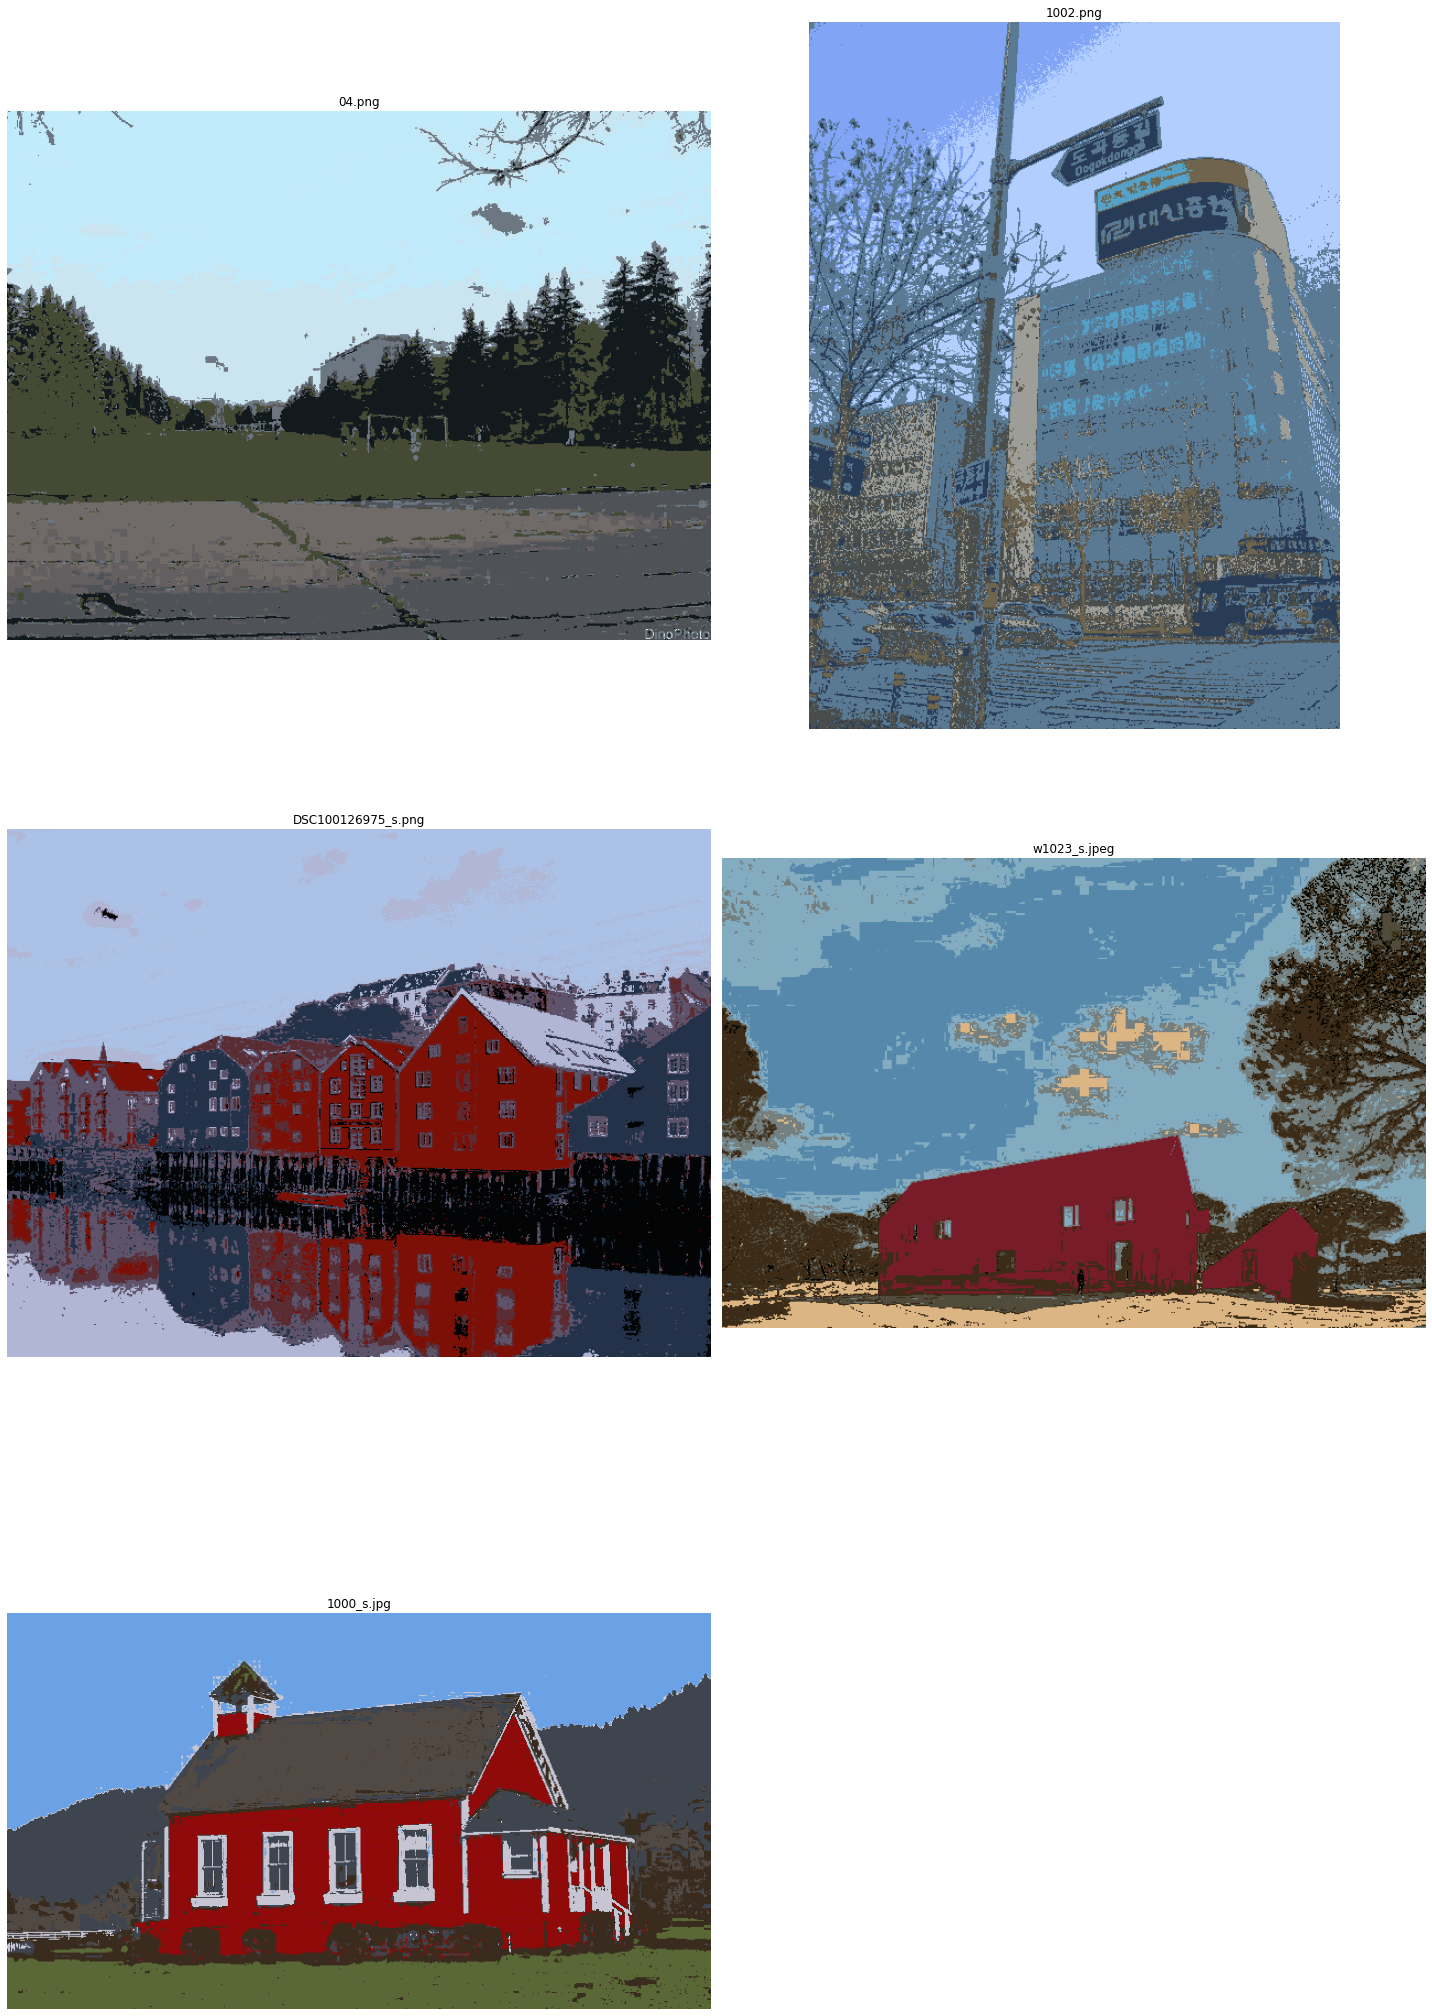

In [14]:
# Hue, Saturation, Value — тон, насыщенность, яркость
img_segment_plot_all(n_components=8,cspace='HSV')

## CMYK

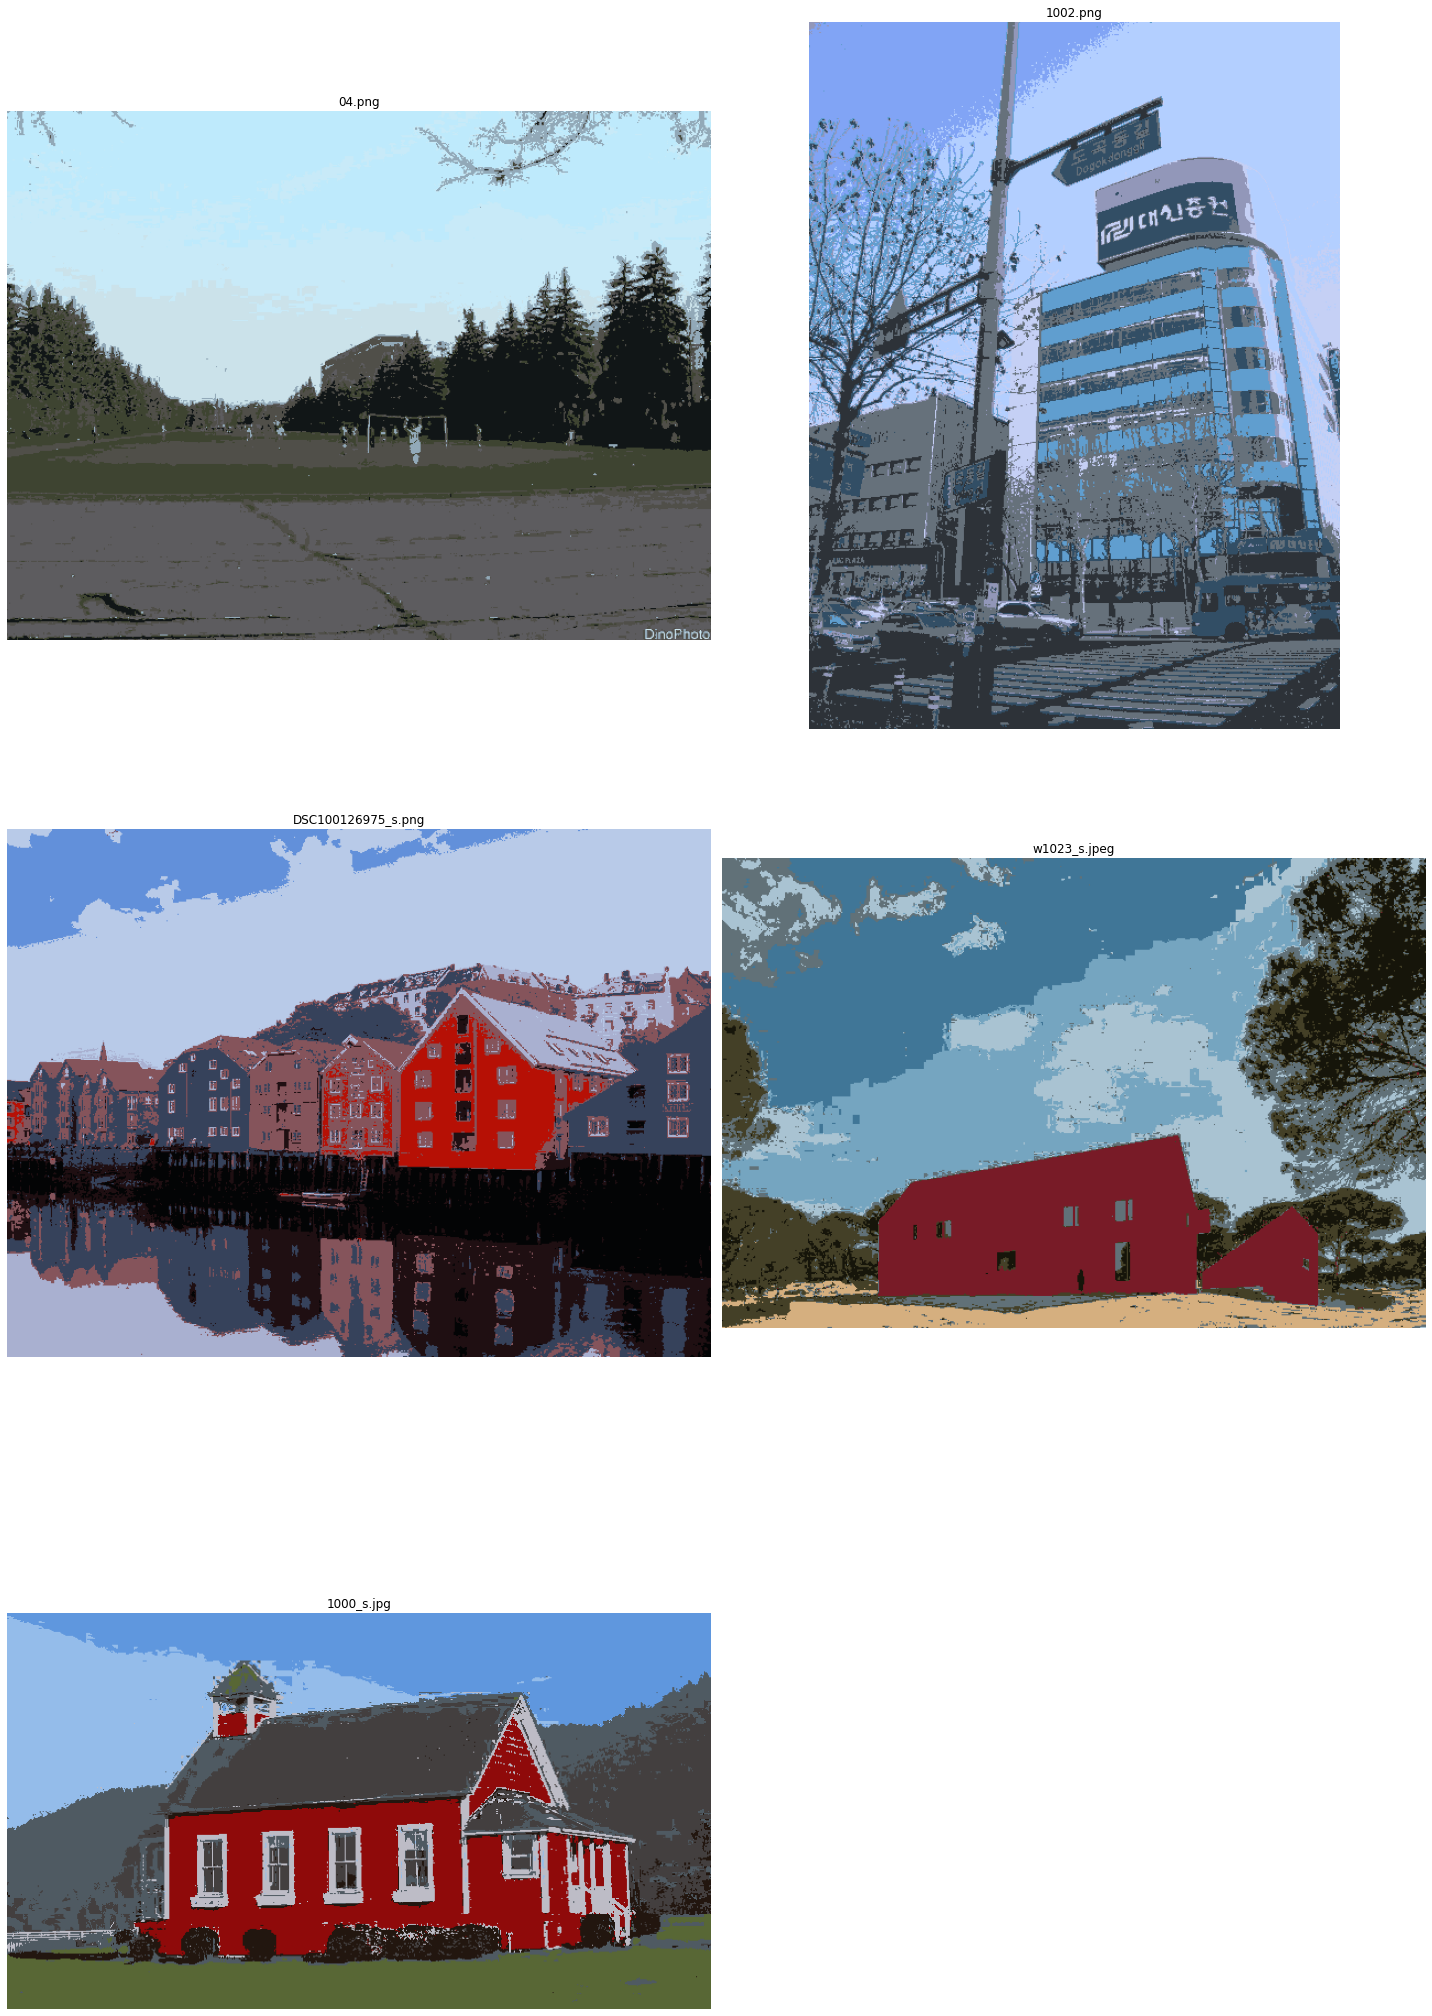

In [15]:
# Cyan, Magenta, Yellow, Black
img_segment_plot_all(n_components=8,cspace='CMYK')